In [1]:
import tweepy                       
from textblob import TextBlob       
import pandas as pd                 
import numpy as np                  
import re                           
import matplotlib.pyplot as pt      

In [3]:
twitterApiKey = configure['ApiKey'][0]
twitterApiSecretKey = configure['ApiSecret'][0]
twitterApiAccessToken=configure['ApiAccessToken'][0]
twitterApiAccessTokenSecret=configure['ApiAccessTokenSecret'][0]

In [4]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecretKey)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
twitterAccount = input('Enter Twitter account to be analyzed: ')
print(twitterAccount)

Enter Twitter account to be analyzed: narendramodi
narendramodi


In [6]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                      screen_name=twitterAccount,
                      count = None,
                      since_id = None,
                      max_id = None,trim_user = True,exclude_replies = True,contributor_details=False,
                      include_entities = False).items(50);

In [7]:
df = pd.DataFrame(data = [tweet.text for tweet in tweets],columns=['Tweet'])  #dataframe consisting of tweets of the user

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [8]:
df.head() 

,Tweet
0,"Exceptional effort, indicative of the passion ..."
1,আমাৰ ইতিহাসত অসম আন্দোলনৰ এক বিশেষ স্থান আছে। ...
2,The Assam Movement has a special place in our ...
3,"In Goa, I will be addressing the 9th World Ayu..."
4,"Tomorrow, 11th December is a special day for M..."


In [9]:
def cleaning_the_data(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt 

In [10]:
df['Tweet']=df['Tweet'].apply(cleaning_data)

In [11]:
def get_text(txt):
    return TextBlob(txt).sentiment.subjectivity

In [12]:
def get_text_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
df['Subjectivity']=df['Tweet'].apply(get_text)
df['Polarity']=df['Tweet'].apply(get_text_polarity)

In [14]:
df.head(10)

,Tweet,Subjectivity,Polarity
0,"Exceptional effort, indicative of the passion ...",0.875000,0.520833
1,আমাৰ ইতিহাসত অসম আন্দোলনৰ এক বিশেষ স্থান আছে। ...,0.000000,0.000000
2,The Assam Movement has a special place in our ...,0.735714,0.528571
3,"In Goa, I will be addressing the 9th World Ayu...",0.000000,0.000000
4,"Tomorrow, 11th December is a special day for M...",0.335714,0.328571
5,"I will be in Maharashtra and Goa tomorrow, 11t...",0.000000,0.000000
6,The coming generations will remember Sulochana...,0.000000,0.000000
7,"Chaired a meeting of Governors, LGs and CMs to...",0.000000,0.000000
8,आज देश की माताएं-बहनें और बेटियां चुनाव में कम...,0.000000,0.000000
9,आज देश का मतदाता शॉर्टकट की राजनीति नहीं चाहता...,0.000000,0.000000


In [15]:
df=df.drop(df[df['Tweet']==''].index)

In [16]:
def text_Analysis(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [17]:
df['Type_of_Tweet']=df['Polarity'].apply(textAnalysis)

In [18]:
df.head(50)

,Tweet,Subjectivity,Polarity,Type_of_Tweet
0,"Exceptional effort, indicative of the passion ...",0.875000,0.520833,Positive
1,আমাৰ ইতিহাসত অসম আন্দোলনৰ এক বিশেষ স্থান আছে। ...,0.000000,0.000000,Neutral
2,The Assam Movement has a special place in our ...,0.735714,0.528571,Positive
3,"In Goa, I will be addressing the 9th World Ayu...",0.000000,0.000000,Neutral
4,"Tomorrow, 11th December is a special day for M...",0.335714,0.328571,Positive
5,"I will be in Maharashtra and Goa tomorrow, 11t...",0.000000,0.000000,Neutral
6,The coming generations will remember Sulochana...,0.000000,0.000000,Neutral
7,"Chaired a meeting of Governors, LGs and CMs to...",0.000000,0.000000,Neutral
8,आज देश की माताएं-बहनें और बेटियां चुनाव में कम...,0.000000,0.000000,Neutral
9,आज देश का मतदाता शॉर्टकट की राजनीति नहीं चाहता...,0.000000,0.000000,Neutral


In [19]:
#calculation of positive tweets

positive=df[df['Type_of_Tweet']=='Positive']
print(str(positive.shape[0]/(df.shape[0])*100)+'% of positive Tweets')
pos=positive.shape[0]/df.shape[0]*100

26.0% of positive Tweets


In [20]:
negative=df[df['Type_of_Tweet']=='Negative']
print(str(negative.shape[0]/(df.shape[0])*100)+'% of Negative Tweets')
neg=negative.shape[0]/df.shape[0]*100

8.0% of Negative Tweets


In [21]:
neutral=df[df['Type_of_Tweet']=='Neutral']
print(str(neutral.shape[0]/(df.shape[0])*100)+'% of Neutral Tweets')
neu=neutral.shape[0]/df.shape[0]*100

66.0% of Neutral Tweets


In [22]:
explode=(0,0.1,0)   #used to transform each element of a list to a row, replicating the index values
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neu]
colors=['yellow','red','violet']

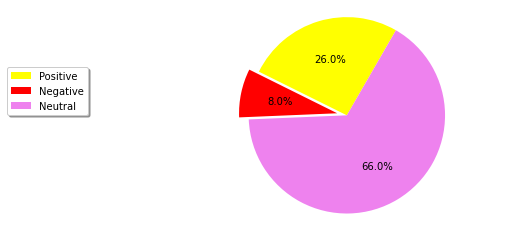

In [23]:
pt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=60)
pt.legend(labels,loc=(-0.5,0.5),shadow=True)
pt.axis('equal')
pt.savefig('Tweet_Analyzer.png')

<BarContainer object of 3 artists>

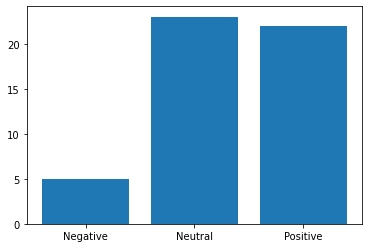

In [24]:
labels=df.groupby('Type_of_Tweet').count().index.values
values=df.groupby('Type_of_Tweet').size().values
pt.bar(labels,values)

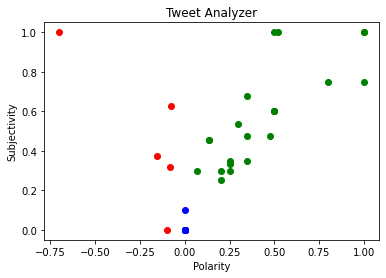

In [25]:
for index,row in df.iterrows():
    if row['Type_of_Tweet']=='Positive':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Type_of_Tweet']=='Negative':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Type_of_Tweet']=='Neutral':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
pt.title('Tweet Analyzer')
pt.xlabel('Polarity')
pt.ylabel('Subjectivity')
pt.show()